In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
import os
import shutil
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.makedirs('/root/.kaggle', exist_ok=True)

In [ ]:
shutil.copy('/content/drive/MyDrive/kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [ ]:
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset
License(s): CC0-1.0
  0% 0.00/134M [00:00<?, ?B/s]
100% 134M/134M [00:00<00:00, 2.09GB/s]


In [ ]:
with zipfile.ZipFile('multiclass-weather-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('weather_dataset')

In [ ]:
!cp -r /content/weather_dataset /content/drive/MyDrive/

In [ ]:
dataset_path = '/content/weather_dataset/dataset'

In [ ]:
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... and {len(files) - 5} more files')

dataset/
  test.csv
  cloudy/
    cloudy222.jpg
    cloudy194.jpg
    cloudy283.jpg
    cloudy45.jpg
    cloudy145.jpg
    ... and 295 more files
  shine/
    shine50.jpg
    shine61.jpg
    shine119.jpg
    shine118.jpg
    shine214.jpg
    ... and 245 more files
  alien_test/
    Cloud_3.jpeg
    shine_3.jpg
    rain_6.jpg
    foggy_8.jpg
    shine_1.jpg
    ... and 25 more files
  foggy/
    foggy32.jpg
    foggy15.jpg
    foggy178.jpg
    foggy190.jpg
    foggy171.jpg
    ... and 295 more files
  rainy/
    rain52.jpg
    rain198.jpg
    rain80.jpg
    rain192.jpg
    rain297.jpg
    ... and 295 more files
  sunrise/
    sunrise3.jpg
    sunrise252.jpg
    sunrise133.jpg
    sunrise297.jpg
    sunrise121.jpg
    ... and 345 more files


Define class names and their corresponding folder names

In [ ]:
class_names = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
class_labels = [0, 1, 2, 3, 4]

Count images per class

In [ ]:
image_counts = {}
image_paths = {}
total_images = 0


print("DATASET STATISTICS")


for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):
        images = os.listdir(class_path)
        image_count = len([img for img in images if img.endswith(('.jpg', '.jpeg', '.png'))])
        image_counts[class_name] = image_count
        image_paths[class_name] = [os.path.join(class_path, img) for img in images
                                   if img.endswith(('.jpg', '.jpeg', '.png'))]
        total_images += image_count
        print(f"{class_name.capitalize()}: {image_count} images")
    else:
        print(f"Warning: {class_name} directory not found!")

print(f"\nTotal images: {total_images}")

DATASET STATISTICS
Cloudy: 300 images
Foggy: 300 images
Rainy: 300 images
Shine: 250 images
Sunrise: 350 images

Total images: 1500


Check alien_test folder

In [ ]:
alien_test_path = os.path.join(dataset_path, 'alien_test')
if os.path.exists(alien_test_path):
    alien_images = [img for img in os.listdir(alien_test_path)
                    if img.endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Alien test images: {len(alien_images)}")

Alien test images: 30


VISUALIZE CLASS DISTRIBUTION

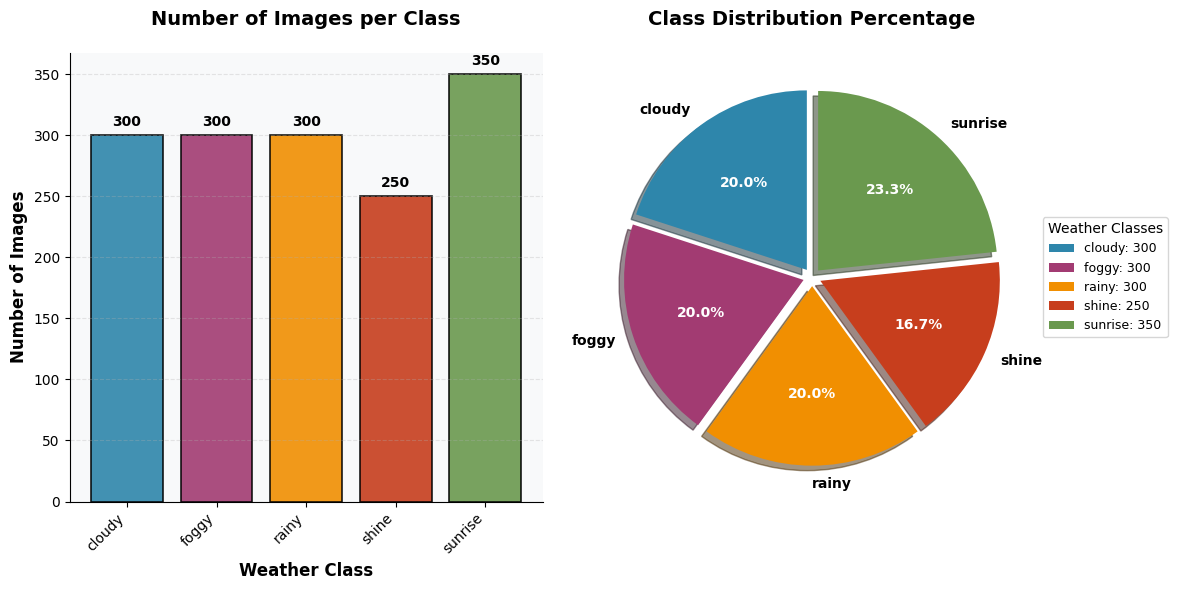

In [ ]:
# Create bar plot for class distribution
plt.figure(figsize=(12, 6))

# Define a better color palette
class_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

# Bar plot
plt.subplot(1, 2, 1)
bars = plt.bar(class_names, [image_counts.get(c, 0) for c in class_names],
               color=class_colors, edgecolor='black', linewidth=1.2, alpha=0.9)
plt.title('Number of Images per Class', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Weather Class', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Images', fontsize=12, fontweight='semibold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom',
             fontweight='bold', fontsize=10)

# Set background color for better readability
plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Pie chart
plt.subplot(1, 2, 2)
# Use explode to highlight slices
explode = [0.05] * len(class_names)  # Slightly separate all slices

wedges, texts, autotexts = plt.pie(
    [image_counts.get(c, 0) for c in class_names],
    labels=class_names,
    autopct='%1.1f%%',
    colors=class_colors,
    explode=explode,
    shadow=True,
    startangle=90,
    textprops={'fontsize': 10, 'fontweight': 'semibold'}
)

# Make autopct text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.title('Class Distribution Percentage', fontsize=14, fontweight='bold', pad=20)

# Add a legend with class names and counts
legend_labels = [f'{name}: {image_counts.get(name, 0)}' for name in class_names]
plt.legend(wedges, legend_labels,
           title="Weather Classes",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=9)

plt.tight_layout()
plt.show()

SAMPLE IMAGE VISUALIZATION

Cloudy sample: cloudy222.jpg
  Size: (265, 166), Mode: RGB
Foggy sample: foggy32.jpg
  Size: (891, 611), Mode: RGB
Rainy sample: rain52.jpg
  Size: (2244, 1458), Mode: RGB
Shine sample: shine50.jpg
  Size: (300, 168), Mode: RGB
Sunrise sample: sunrise3.jpg
  Size: (760, 507), Mode: RGB


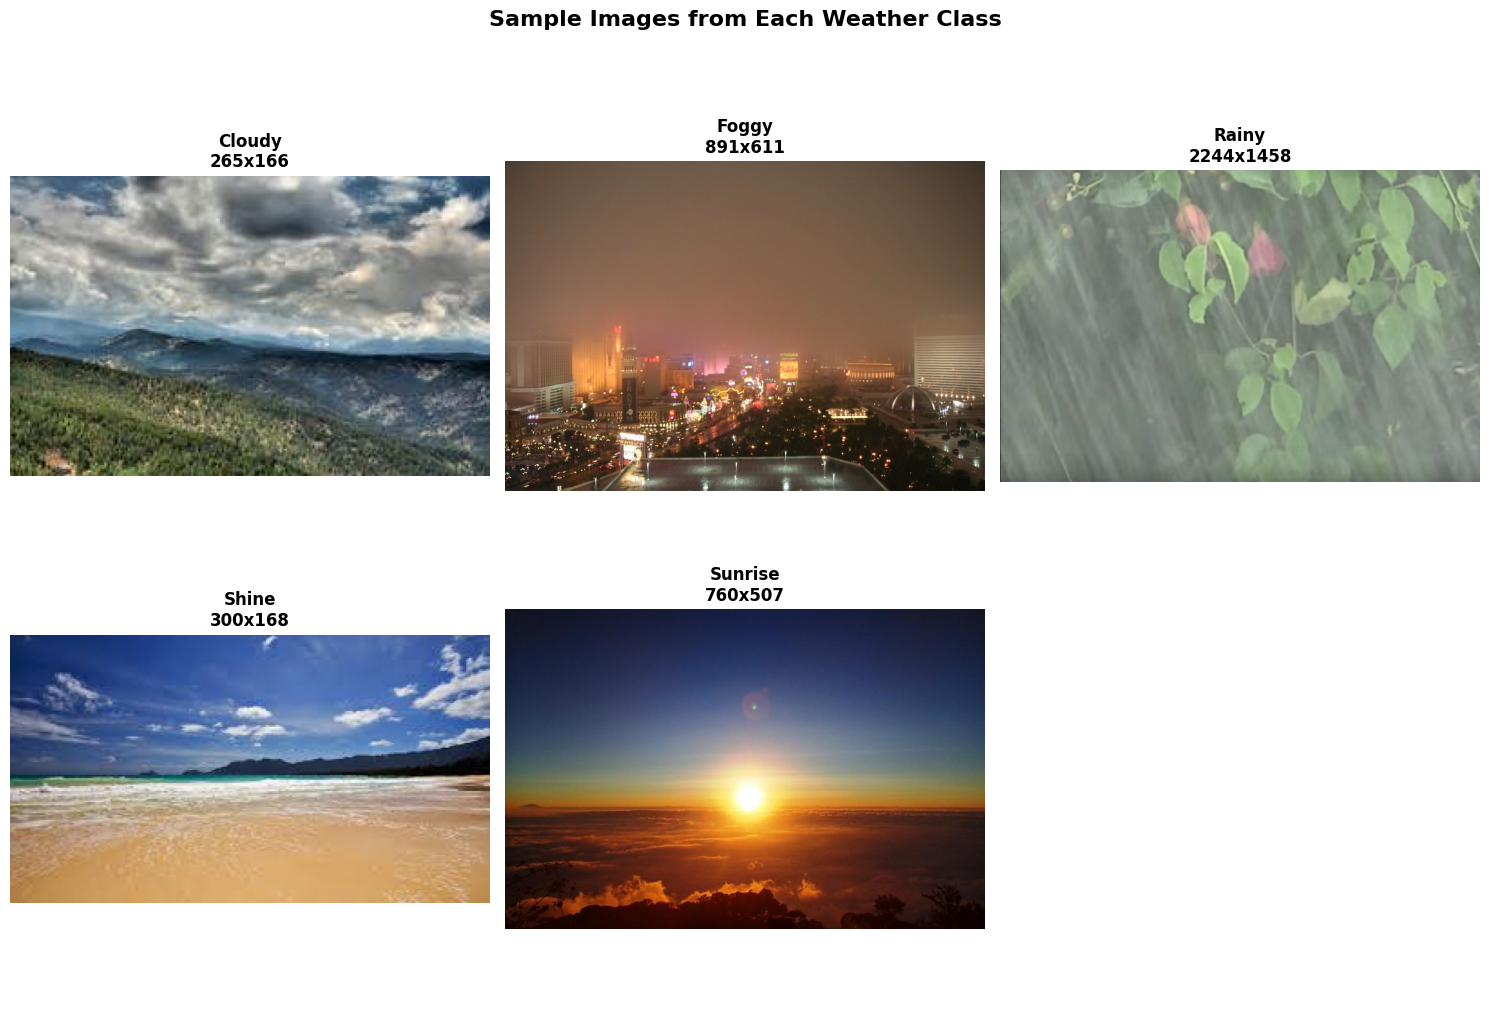

In [ ]:
# Display sample images from each class
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Display one image from each class
for idx, class_name in enumerate(class_names[:5]):  # First 5 classes
    if class_name in image_paths and len(image_paths[class_name]) > 0:
        img_path = image_paths[class_name][0]  # Take first image
        img = Image.open(img_path)

        axes[idx].imshow(img)
        axes[idx].set_title(f'{class_name.capitalize()}\n{img.size[0]}x{img.size[1]}',
                           fontweight='bold')
        axes[idx].axis('off')

        # Print image info
        print(f"{class_name.capitalize()} sample: {os.path.basename(img_path)}")
        print(f"  Size: {img.size}, Mode: {img.mode}")
    else:
        axes[idx].text(0.5, 0.5, f"No {class_name} images",
                      ha='center', va='center', fontsize=12)
        axes[idx].axis('off')


if len(class_names) == 5:
    axes[5].axis('off')

plt.suptitle('Sample Images from Each Weather Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

IMAGE DIMENSION ANALYSIS

IMAGE DIMENSION ANALYSIS
Total images analyzed for dimensions: 250
Average dimensions: 544 x 376
Min dimensions: 168 x 111
Max dimensions: 3000 x 2034
Most common dimension: (259, 194)


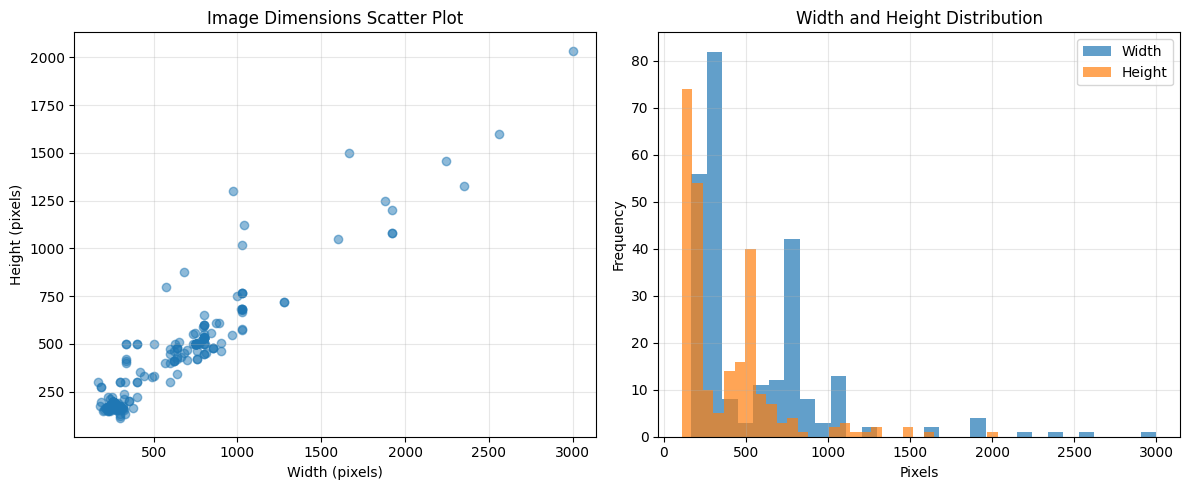

In [ ]:
# Analyze image dimensions across the dataset

print("IMAGE DIMENSION ANALYSIS")


dimensions = []
for class_name in class_names:
    if class_name in image_paths:
        for img_path in image_paths[class_name][:50]:
            try:
                with Image.open(img_path) as img:
                    dimensions.append(img.size)
            except:
                continue

if dimensions:
    widths, heights = zip(*dimensions)

    print(f"Total images analyzed for dimensions: {len(dimensions)}")
    print(f"Average dimensions: {np.mean(widths):.0f} x {np.mean(heights):.0f}")
    print(f"Min dimensions: {min(widths)} x {min(heights)}")
    print(f"Max dimensions: {np.max(widths)} x {np.max(heights)}")
    print(f"Most common dimension: {max(set(dimensions), key=dimensions.count)}")

    # Plot dimension distribution
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(widths, heights, alpha=0.5)
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.title('Image Dimensions Scatter Plot')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.hist(widths, bins=30, alpha=0.7, label='Width')
    plt.hist(heights, bins=30, alpha=0.7, label='Height')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.title('Width and Height Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("No image dimensions could be analyzed.")

CHECK FOR TEST.CSV FILE

In [ ]:
csv_path = os.path.join(dataset_path, 'test.csv')
if os.path.exists(csv_path):
    test_df = pd.read_csv(csv_path)
    print(f"\nTest CSV file found with {len(test_df)} entries")
    print(f"Columns: {test_df.columns.tolist()}")
    print("\nFirst few rows:")
    print(test_df.head())
else:
    print("\nNo test.csv file found in the dataset")


Test CSV file found with 30 entries
Columns: ['Image_id', 'labels']

First few rows:
       Image_id  labels
0   Cloud_1.png       0
1   Cloud_2.jpg       0
2  Cloud_3.jpeg       0
3   Cloud_4.jpg       0
4   foggy_1.jpg       1
